- **rlnFourierShellCorrelationCorrected** = Final FSC value: i.e. after correction based on masking of randomized-phases maps
- **rlnFourierShellCorrelationParticleMaskFraction** = CisTEM-like correction of unmasked FSCs, based on fraction of white pixels in solvent mask
- **rlnFourierShellCorrelationUnmaskedMaps** = FSC value before masking of the original maps
- **rlnFourierShellCorrelationMaskedMaps** = FSC value after masking of the original maps
- **rlnCorrectedFourierShellCorrelationPhaseRandomizedMaskedMaps** = FSC value after masking of the randomized-phases maps

In [5]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from fractions import Fraction

import starfile
from color_palette import *

In [101]:
input_postprocess_star = Path("/mnt/scratch/ribosomes/kas_k44a/relion_full/PostProcess/job208/postprocess.star")

Final resolution: 8.98 Å
Randomise from: 18.65 Å


/tmp/ipykernel_523854/4187614718.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fsc_data["rlnResolution"] = fsc_data["rlnResolution"].copy() * binning
/tmp/ipykernel_523854/4187614718.py:120: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(font_size)
/tmp/ipykernel_523854/4187614718.py:155: RuntimeWarning: divide by zero encountered in double_scalars
  xticks = [f"{1/x:.1f}"+r"$^{-1}$" for x in xticks]
/tmp/ipykernel_523854/4187614718.py:157: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks)


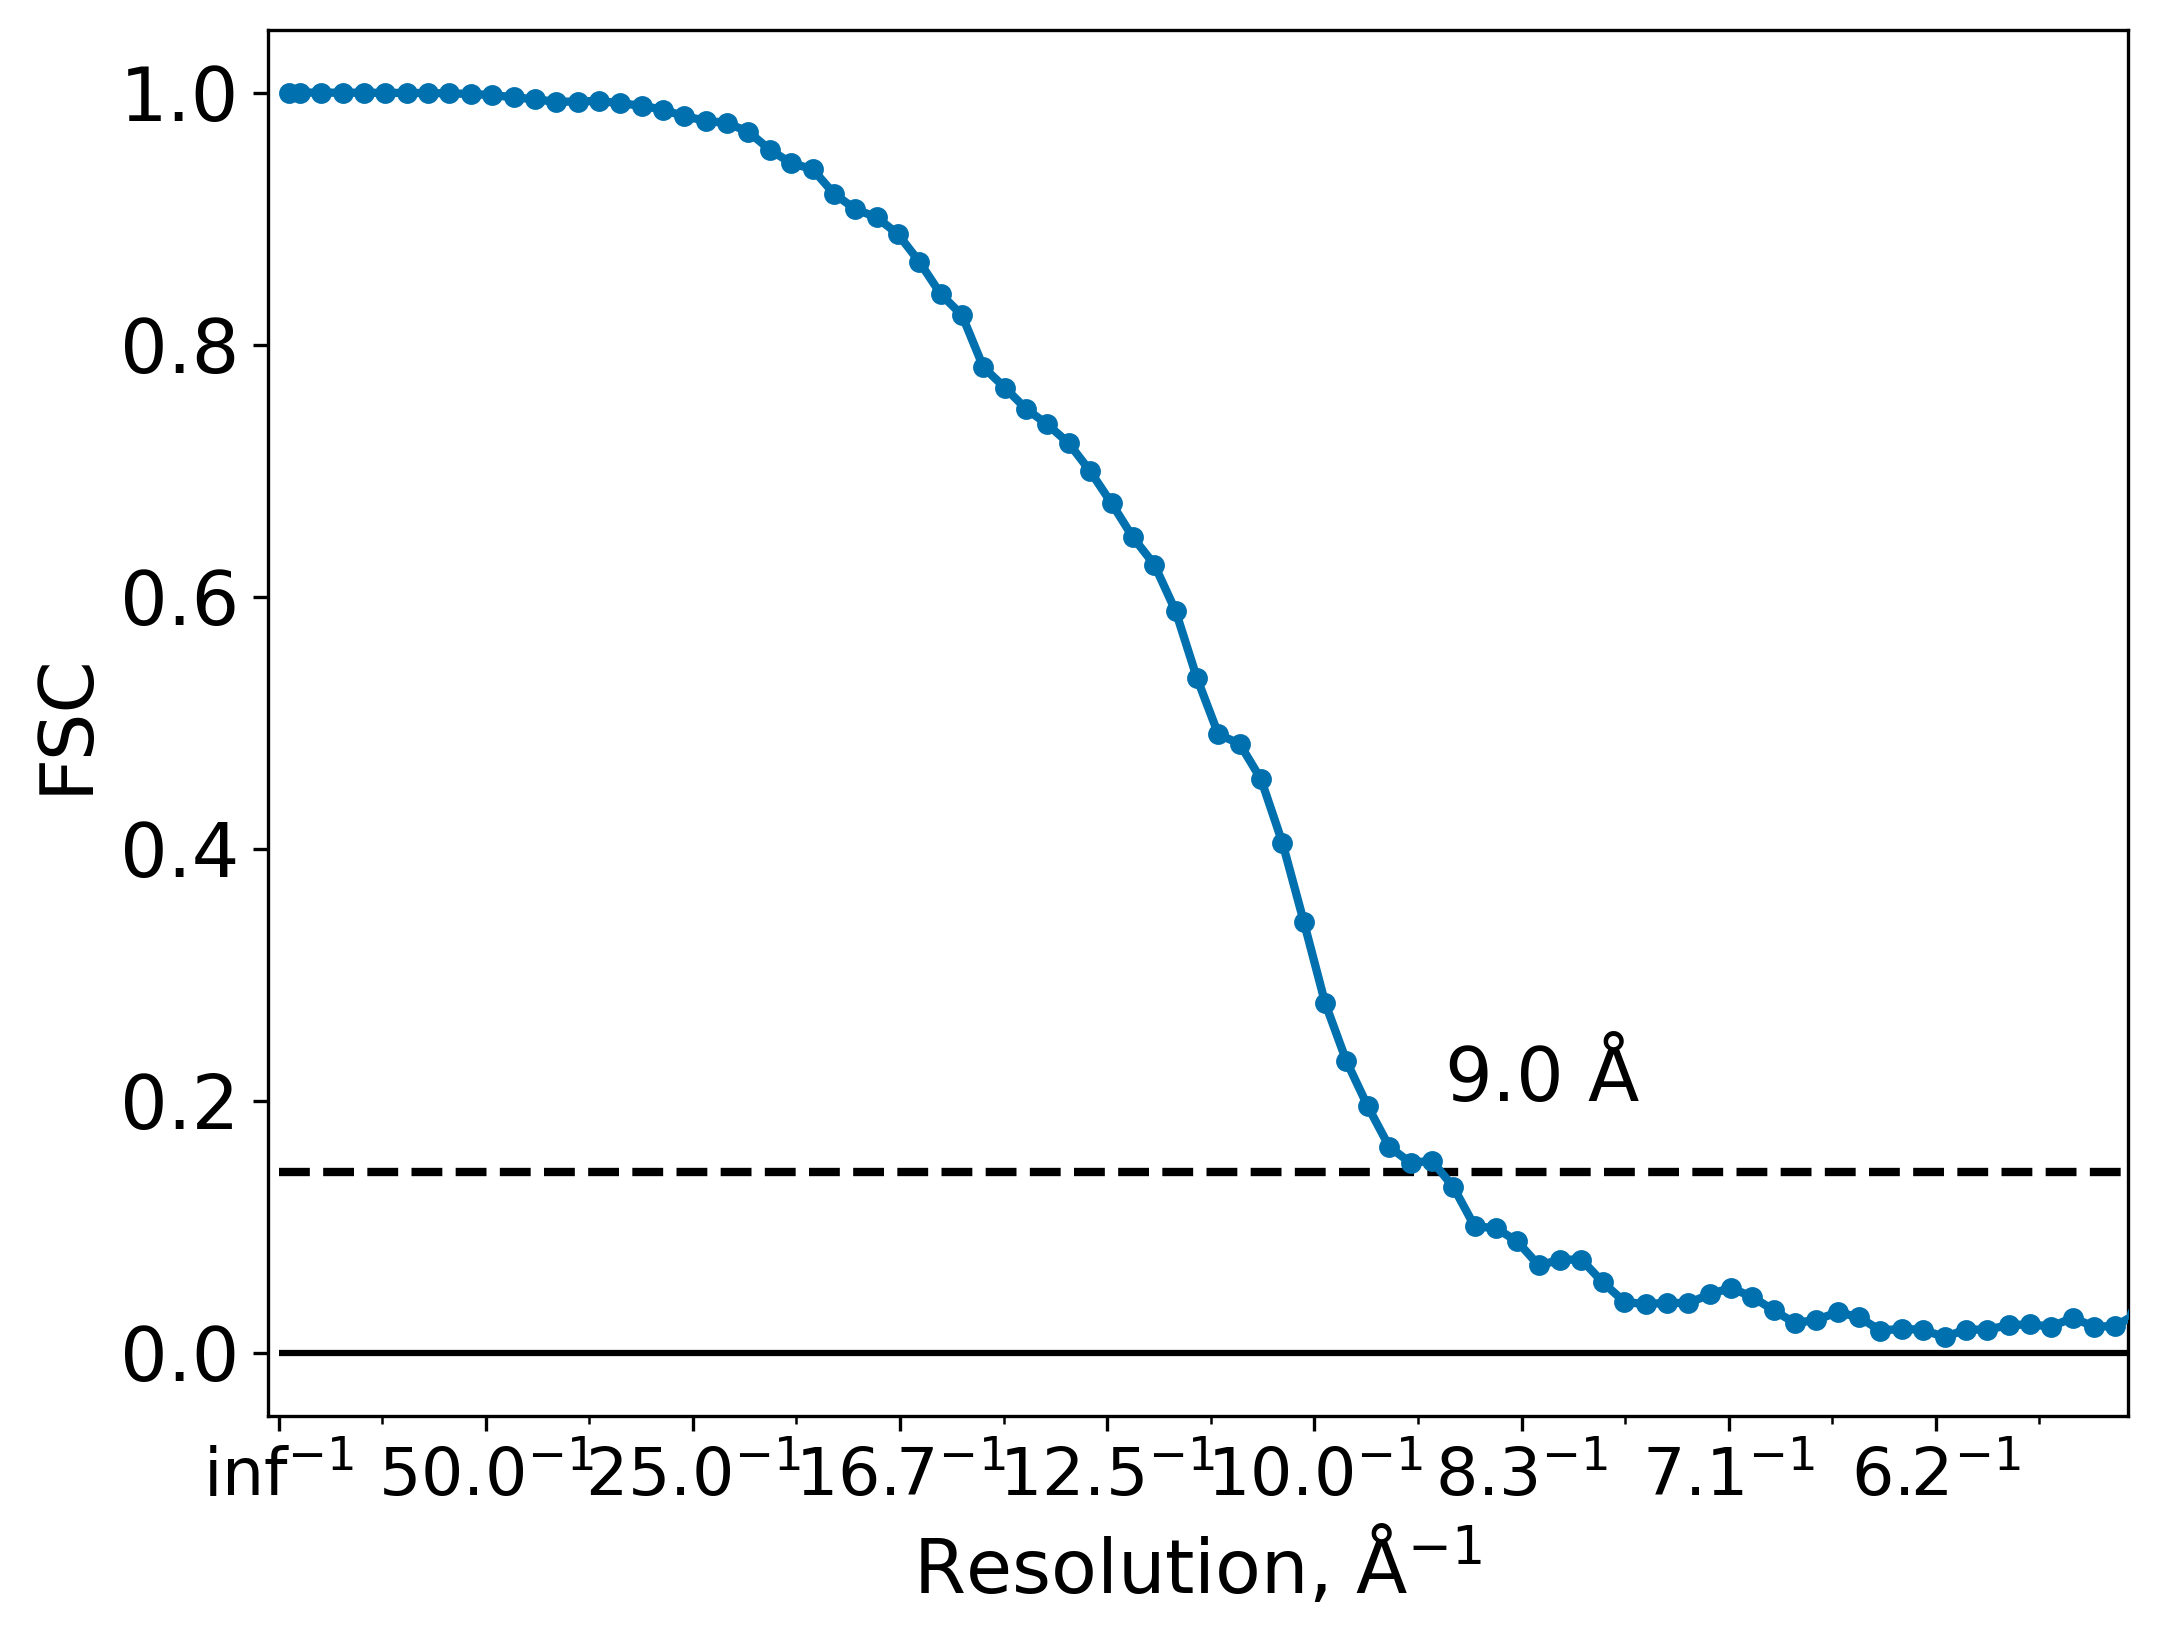

In [104]:
plt.rcParams["font.size"] = 18
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
fig.set_dpi(300)

data = starfile.read(input_postprocess_star)
fsc_data = data["fsc"][[
    "rlnResolution",
    "rlnFourierShellCorrelationCorrected",
    "rlnFourierShellCorrelationUnmaskedMaps",
    "rlnFourierShellCorrelationMaskedMaps",
    "rlnCorrectedFourierShellCorrelationPhaseRandomizedMaskedMaps"
]]
general_data = data["general"]
final_resolution = general_data["rlnFinalResolution"].values[0]
print(f"Final resolution: {final_resolution:.2f} Å")
randomise_from = general_data["rlnRandomiseFrom"].values[0]
print(f"Randomise from: {randomise_from:.2f} Å")

binning = 1
fsc_data["rlnResolution"] = fsc_data["rlnResolution"].copy() * binning
fsc_data.set_index("rlnResolution", inplace=True)
x_data = fsc_data.index

y_data_list = [
    fsc_data["rlnFourierShellCorrelationCorrected"],
#    fsc_data["rlnFourierShellCorrelationParticleMaskFraction"],
    fsc_data["rlnFourierShellCorrelationUnmaskedMaps"],
    fsc_data["rlnFourierShellCorrelationMaskedMaps"],
    fsc_data["rlnCorrectedFourierShellCorrelationPhaseRandomizedMaskedMaps"],
]


low_alpha = 0.15
linestyle = "-"
linewidth = 2
markerstyle = "."
markersize = 8
# ax.plot(x_data, y_data_list[0], 
#         label="Corrected",
#         color="k",
#         alpha=1.0,
#         ls=linestyle,
#         linewidth=linewidth,
#         marker=markerstyle,
#         markersize=markersize,
#         zorder=10,
#         )
ax.plot(x_data, y_data_list[2], 
        label="Uncorrected",
        color=color_palette()[0],
        alpha=1,
        ls=linestyle,
        linewidth=linewidth,
        marker=markerstyle,
        markersize=markersize,
        zorder=8,
        )

# ax.plot(x_data, y_data_list[3], 
#         label="Noise-substituted",#"Masked, Phase-randomized",
#         color=color_palette()[1],
#         alpha=1.0,
#         ls=linestyle,
#         linewidth=linewidth,
#         marker=markerstyle,
#         markersize=markersize,
#         zorder=9,
#         )


# ax.plot(x_data, y_data_list[1], 
#        label="Unmasked",
#        color=color_palette()[3],
#        alpha=1,
#        ls=linestyle,
#        linewidth=linewidth,
#        marker=markerstyle,
#        markersize=markersize,
#        zorder=7,
#        )

#ax.plot(x_data, y_data_list[1], 
#        label="rlnFourierShellCorrelationParticleMaskFraction",
#        linestyle="dashed",
#        linewidth=linewidth,
#        #color="black",
#        )

alpha = 0.25
resolution = 1/randomise_from
start_index = np.where(x_data > resolution)[0][0]
# ax.fill_between(
#     x_data[start_index-1:],
#     y_data_list[2].iloc[start_index-1:],
#     y_data_list[3].iloc[start_index-1:],
#     color=color_palette()[0],
#     alpha=alpha,
# )
# ax.fill_between(
#     x_data[start_index-1:],
#     0,
#     y_data_list[3].iloc[start_index-1:],
#     color=color_palette()[1],
#     alpha=alpha,
# )
x_min = np.max(x_data)
x_max = np.min(x_data)
ax.set_xlim(
    xmin=-0.001,
    xmax = 1/5.6, #50, 25, 16.7, 12.5, 10.0, 8.3, 7.1, 6.2
    )
ax.set_ylim(
    ymin=-0.05,
    ymax=1.05,
    )   
# change x tick font size
font_size = 16
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(font_size)


#ax.scatter(1/final_resolution, 0.143, marker="x", color="black", alpha=alpha)
ax.hlines(0, 0, 1, colors="k", linestyles="-", alpha=1)
ax.hlines(0.143, 0, 1, colors="k", linestyles="--", linewidth=2, alpha=1)#alpha)
#ax.annotate(xy=(0.062, 0.16), text="0.143", alpha=1, fontsize=16)
ax.annotate(xy=(1/final_resolution+0.0012, 0.2), text=rf"{final_resolution:.1f}"+r" $\mathrm{\AA}$", alpha=1)
# draw arrow to final resolution and specify the tail length
# ax.annotate(
#     "",
#     xy=(1/final_resolution+0.004, 0.38),
#     xytext=(1/final_resolution+0.0003, 0.2),
#     arrowprops=dict(arrowstyle="<-", color="black", alpha=1, linewidth=2),
# )
# resolution = 17.33 # Angstroms
# ax.vlines(1/resolution, -1,2, linestyles="dashed", colors="black", alpha=alpha)
# ax.annotate(f"{resolution} $\mathrm{{\AA}}$, bin8", (1/resolution+0.001, 0.7), xycoords="data", alpha=alpha+0.2, fontsize=font_size)
#resolution = 8.66 # Angstroms
#ax.vlines(1/resolution, -1,2, linestyles="dashed", colors="black", alpha=alpha)
#ax.annotate(f"{resolution} $\mathrm{{\AA}}$, bin4", (1/resolution+0.001, 0.7), xycoords="data", alpha=alpha+0.2, fontsize=font_size)
# resolution = 6.495 # Angstroms
# ax.vlines(1/resolution, -1,2, linestyles="dashed", colors="black", alpha=alpha)
# ax.annotate(f"{resolution} $\mathrm{{\AA}}$, bin3", (1/resolution+0.001, 0.7), xycoords="data", alpha=alpha+0.2, fontsize=font_size)
ax.set_xlabel(r"Resolution, $\mathrm{\AA}^{-1}$")
ax.set_ylabel("FSC")#\n(Normalized CC of two half-datasets)")

#ax.set_title(f"{input_postprocess_star.parent.name} (binning={binning})")

ax.xaxis.set_major_locator(MultipleLocator(0.02))
ax.xaxis.set_minor_locator(MultipleLocator(0.01))

# grab the labeled x ticks and print them
xticks = ax.get_xticks()
xticks = np.round(xticks, 2)
xticks = [f"{1/x:.1f}"+r"$^{-1}$" for x in xticks]

ax.set_xticklabels(xticks)



# plt.legend(fontsize=14)
plt.savefig("/home/michalakdj/working/fsc.png", dpi=300, bbox_inches="tight")